# Chap6.8 - 6.9

In [1]:
using BasisMatrices
using Plots
using NLsolve
pyplot()

Plots.PyPlotBackend()

## Chap6.8 The Collocation Method

最初に, 解析的に解が求まるケースを考える. 

$MC = c $, $D(p) = p^{-\eta}$ のとき, $S(p) = \eta (p - c) p^{-\eta}$

$\alpha = 1.0, c = 0.2, \eta = 1.5$ とする.

Settings

In [67]:
alpha = 1.0
eta = 1.5
c = 0.5
degree = 25
lower_b = 0.1
upper_b = 5.0

true_S(p) = eta .* (p .- c) .* p .^ (-eta)

marginal_demand(p) = -eta ./ p .^(eta+1)
marginal_cost(q) = q .* 0 .+ c
compute_residual(p, S_p) = (p .+ S_p ./ marginal_demand(p)) .- marginal_cost(S_p)

basis = Basis(LinParams(degree, lower_b, upper_b))
chev_nodes, = nodes(basis)

println(compute_residual([2, 1], [0.1, 0]))

[1.12288,0.5]


Calculate coefs using NLSolve

broyden method: https://github.com/matthieugomez/NLsolve.jl.git

In [68]:
function objective!(coefs, residuals)
    S_p = funeval(coefs, basis, chev_nodes)
    residuals .= compute_residual(chev_nodes, S_p)
end

# initial coefficients
init_coefs = zeros(degree)
init_coefs .= 0.1

result = nlsolve(objective!, init_coefs, method = :broyden, xtol = 0.0, ftol = 1.0e-14)

Results of Nonlinear Solver Algorithm
 * Algorithm: broyden
 * Starting Point: [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
 * Zero: [-189.737,-5.75703,0.0678482,0.743855,0.776875,0.700186,0.612358,0.533875,0.467699,0.412662,0.366857,0.328504,0.296138,0.268597,0.244971,0.224546,0.206761,0.191172,0.177423,0.165229,0.154357,0.144617,0.135852,0.127932,0.120748]
 * Inf-norm of residuals: 0.000000
 * Iterations: 2
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-14: true
 * Function Calls (f): 3
 * Jacobian Calls (df/dx): 1

Chev nodesでの残差は0に近づいているか

In [69]:
coefs = result.zero
residuals_start = compute_residual(chev_nodes, funeval(init_coefs, basis, chev_nodes))
residuals_end = compute_residual(chev_nodes, funeval(coefs, basis, chev_nodes))
for i in 1:degree
    @printf "%0.4f, %0.4f \n" residuals_start[i] residuals_end[i]
end

-0.4002, 0.0000 
-0.1992, 0.0000 
-0.0039, -0.0000 
0.1839, 0.0000 
0.3630, 0.0000 
0.5322, 0.0000 
0.6903, 0.0000 
0.8364, 0.0000 
0.9696, 0.0000 
1.0892, 0.0000 
1.1942, 0.0000 
1.2839, 0.0000 
1.3578, 0.0000 
1.4149, 0.0000 
1.4548, -0.0000 
1.4768, 0.0000 
1.4802, 0.0000 
1.4645, 0.0000 
1.4291, 0.0000 
1.3735, 0.0000 
1.2971, 0.0000 
1.1994, 0.0000 
1.0798, 0.0000 
0.9379, 0.0000 
0.7732, 0.0000 



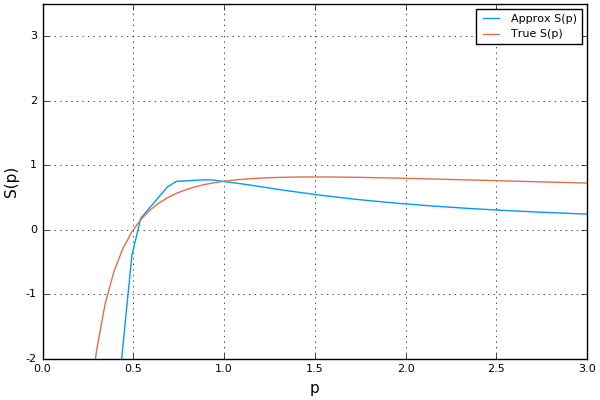

In [70]:
xgrid = collect(linspace(lower_b, upper_b, 101))
f_vals = funeval(coefs, basis, xgrid)
true_vals = true_S(xgrid)

plot(xgrid, f_vals, xlim=(0, 3), ylim=(-2, 3.5), label="Approx S(p)", xlabel = "p", ylabel = "S(p)")
plot!(xgrid, true_vals, xlim=(0, 3), ylim=(-2, 3.5), label="True S(p)", xlabel = "p", ylabel = "S(p)")

次に問題のケース

In [63]:
alpha = 1.0
eta = 1.5
lower_b = 0.1
upper_b = 3.0
initial_c = 0.5

marginal_demand(p) = -eta ./ p .^(eta+1)
marginal_cost(q) = alpha .* q .^0.5 + q .^2
compute_residual(p, S_p) = (p .+ S_p ./ marginal_demand(p)) .- marginal_cost(S_p)


# 25
degree = 25
basis_25 = Basis(ChebParams(degree, lower_b, upper_b))
chev_nodes_25, = nodes(basis_25)
init_coefs = zeros(degree)
init_coefs .= initial_c

function objective_25!(coefs, residuals)
    S_p = funeval(coefs, basis_25, chev_nodes_25)
    S_p = abs(S_p)
    residuals .= compute_residual(chev_nodes_25, S_p)
end

result_25 = nlsolve(objective_25!, init_coefs, method = :broyden, xtol = 0.0, ftol = 1.0e-12)
coefs_25 = result_25.zero
println(result_25)


# 10
degree = 10
basis_10 = Basis(ChebParams(degree, lower_b, upper_b))
chev_nodes_10, = nodes(basis_10)
init_coefs = zeros(degree)
init_coefs .= initial_c

function objective_10!(coefs, residuals)
    S_p = funeval(coefs, basis_10, chev_nodes_10)
    S_p = abs(S_p)
    residuals .= compute_residual(chev_nodes_10, S_p)
end

result_10 = nlsolve(objective_10!, init_coefs, method = :broyden, xtol = 0.0, ftol = 1.0e-12)
coefs_10 = result_10.zero
println(result_10)

Results of Nonlinear Solver Algorithm
 * Algorithm: broyden
 * Starting Point: [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
 * Zero: [0.107995,-0.0778061,-0.0971899,0.138698,0.00927681,-0.057622,0.0198698,0.0491686,0.0100204,-0.023366,0.0118368,0.0444106,0.0127485,-0.0176304,0.0145264,0.0490319,0.0182777,-0.0178687,0.0203483,0.0716409,0.034204,-0.0288687,0.0330999,0.183479,0.198771]
 * Inf-norm of residuals: 0.000000
 * Iterations: 26
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-12: true
 * Function Calls (f): 113
 * Jacobian Calls (df/dx): 4
Results of Nonlinear Solver Algorithm
 * Algorithm: broyden
 * Starting Point: [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
 * Zero: [0.131991,-0.0580329,-0.128895,0.160041,0.0729911,-0.028867,-0.0220243,0.0793647,0.1832,0.160179]
 * Inf-norm of residuals: 0.000000
 * Iterations: 17
 * Convergence: true
   * |x - x'| < 0

.0e+00: false
   * |f(x)| < 1.0e-12: true
 * Function Calls (f): 45
 * Jacobian Calls (df/dx): 3


零点で0になっているか?


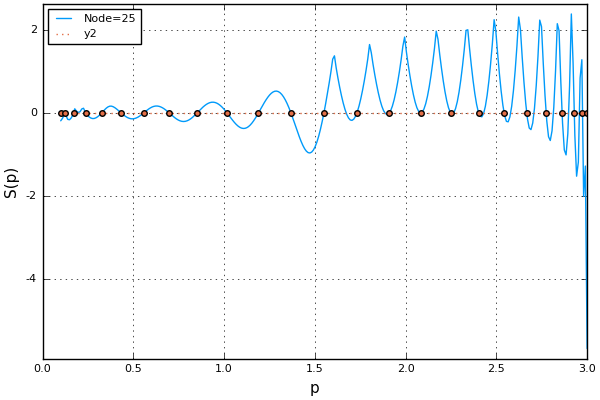

In [64]:
xgrid = collect(linspace(lower_b, upper_b, 301))
f_vals_25 = compute_residual(xgrid, abs(funeval(coefs_25, basis_25, xgrid)))

plot(xgrid, f_vals_25, xlim=(0, 3), label="Node=25", xlabel = "p", ylabel = "S(p)")
plot!(chev_nodes_25, zeros(25), linestyle = :dot, marker='o')


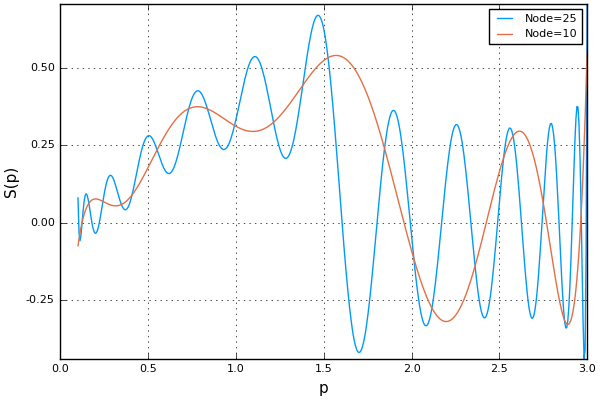

In [65]:
xgrid = collect(linspace(lower_b, upper_b, 501))
f_vals_25 = funeval(coefs_25, basis_25, xgrid)
f_vals_10 = funeval(coefs_10, basis_10, xgrid)

plot(xgrid, f_vals_25, xlim=(0, 3), label="Node=25", xlabel = "p", ylabel = "S(p)")
plot!(xgrid, f_vals_10, label="Node=10")


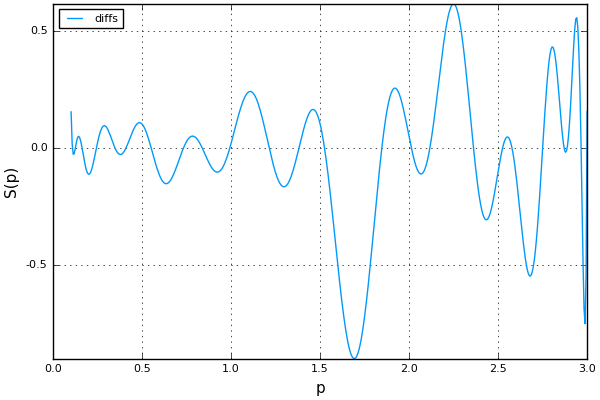

In [66]:
plot(xgrid, f_vals_25.-f_vals_10, xlim=(0, 3), label="diffs", xlabel = "p", ylabel = "S(p)")